In [1]:
import pandas as pd

df = pd.read_csv('../data/student/student-mat.csv', sep=';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [2]:
# check for missing values
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
X = df.filter(items=['studytime']).to_numpy()
Y = df.filter(items=['G3']).to_numpy()
X.shape, Y.shape

((395, 1), (395, 1))

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((316, 1), (79, 1), (316, 1), (79, 1))

In [5]:
from neural_network import NeuralNetwork
from loss.mse import MSE
from layer import Layer

nn = NeuralNetwork(MSE)
nn.add(Layer(1, 1))

losses = nn.train(X_train, Y_train, epochs=10000)
print(nn)

-----
Layer (1, 1)
Weights
[[0.79875822]]
Biases
[[8.86705624]]
-----



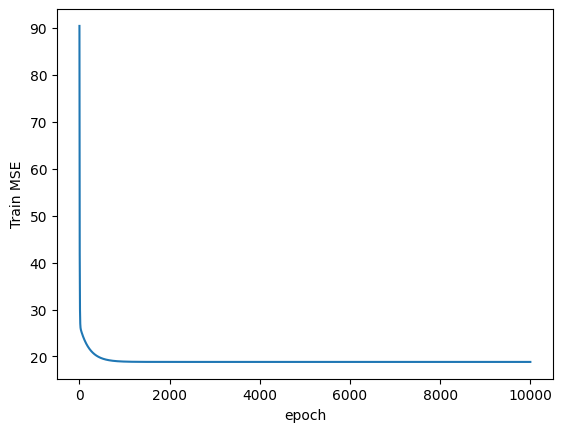

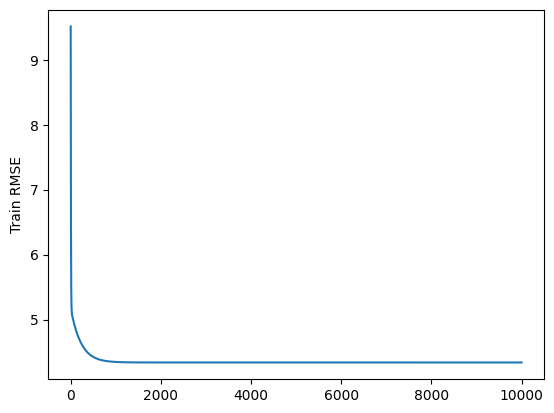

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.ylabel('Train MSE')
plt.xlabel('epoch')
plt.plot(losses)
plt.show()

plt.ylabel('Train RMSE')
plt.plot(np.sqrt(losses))

In [8]:
from loss.mae import MAE

prediction = nn.forward(X_test)
mse = MSE.loss(prediction, Y_test)
rmse = np.sqrt(mse)
mae = MAE().loss(prediction, Y_test)
mse, rmse, mae

(28.613800539145238, 5.349186904487937, 4.233414392887469)

-----
Layer (1, 1)
Weights
[[0.99804769]]
Biases
[[9.00262019]]
-----



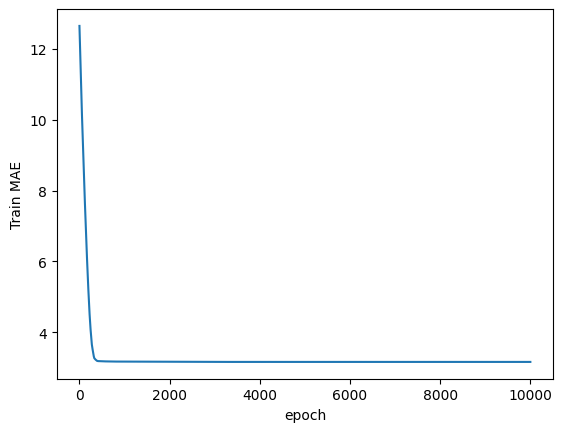

0 3160000
8.998468439932518


In [29]:
nn = NeuralNetwork(MAE())
nn.add(Layer(1, 1))
nn.layers[0].W = np.random.randn(1, 1) * 10
nn.layers[0].b = np.random.randn(1, 1) * 10

losses = nn.train(X_train, Y_train, epochs=10000)
print(nn)

plt.ylabel('Train MAE')
plt.xlabel('epoch')
plt.plot(losses)
plt.show()

predictions = nn.forward(X_test)
print(nn.error.count_derivative_at_0, nn.error.count_derivative_total)
print(nn.error.loss(predictions, X_test))